<a href="https://colab.research.google.com/github/danielortizgalindo/An-lisis-de-telecomunicaciones-ConnectaTel/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id`: no hay id duplicados, usuarios consistentes
- La columna `age`: valores negativos

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas: no presentan errores pero son indicadores

In [ ]:



# explorar columnas categóricas de users

columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"Columna {col}:")
    print(users[col].value_counts())
    print("-" * 30)


Columna city:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
------------------------------
Columna plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64
------------------------------


- La columna `city` ...
- La columna `plan` ...

In [ ]:
# explorar columna categórica de usage
usage['type'].value_counts()

text    22092
call    17908
Name: type, dtype: int64

- La columna `type` ...


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])


In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage["date"])

In [ ]:
# Revisar los años presentes en `reg_date` de users
print(users["reg_date"].dt.year.value_counts())

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

In [ ]:
# Revisar los años presentes en `date` de usage
print(usage["date"].dt.year.value_counts())

2024.0    39950
Name: date, dtype: int64


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users['age'] = users["age"].replace(-999,age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users["city"].replace("?",pd.NA)
users["city"] = users["city"].replace("?",pd.NA)
# Verificar cambios
users["city"].value_counts()

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users["reg_date"].dt.year== 2026,"reg_date"]=pd.NaT

# Verificar cambios
users["reg_date"].value_counts()

2024-06-27 06:08:22.325581392    1
2023-03-31 06:21:20.120030008    1
2024-06-20 09:50:54.463615904    1
2022-05-22 00:23:45.956489122    1
2022-04-23 06:22:24.936234060    1
                                ..
2022-07-29 04:44:06.661665416    1
2022-02-22 00:36:43.750937734    1
2022-10-31 09:22:49.242310580    1
2022-09-24 16:46:48.702175544    1
2022-03-28 12:38:20.975243811    1
Name: reg_date, Length: 3960, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`: se pueden quedar los nulos

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
print(usage.head())

   id  user_id  type                          date  duration  length
0   1    10332  call 2024-01-01 00:00:00.000000000      0.09     NaN
1   2    11458  text 2024-01-01 00:06:30.969774244       NaN    39.0
2   3    11777  text 2024-01-01 00:13:01.939548488       NaN    36.0
3   4    10682  call 2024-01-01 00:19:32.909322733      1.53     NaN
4   5    12742  call 2024-01-01 00:26:03.879096977      4.84     NaN


In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({"is_text":"sum",
                                         "is_call":"sum",
                                         "duration":"sum"}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg.columns = ["user_id","cant_mensajes","cant_llamadas","cant_minutos_llamada"]
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users,usage_agg, on = "user_id",how = "left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
columnas_numericas = ["age","cant_mensajes","cant_llamadas","cant_minutos_llamada"]
user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize = True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

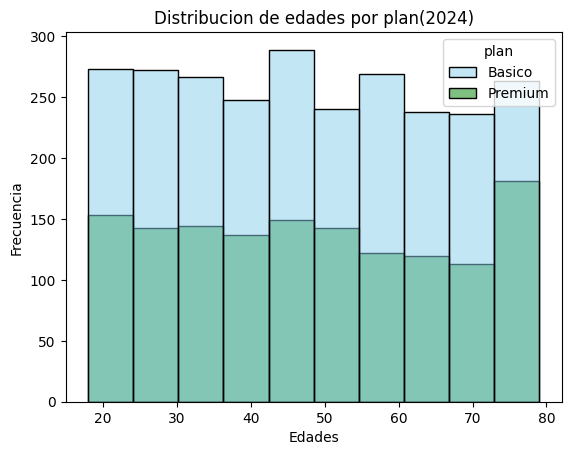

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data = user_profile, x = "age", hue='plan',bins = 10, palette=['skyblue','green'])
plt.title("Distribucion de edades por plan(2024)")
plt.xlabel("Edades")
plt.ylabel("Frecuencia")
plt.show()

💡Insights:
- Distribución ...

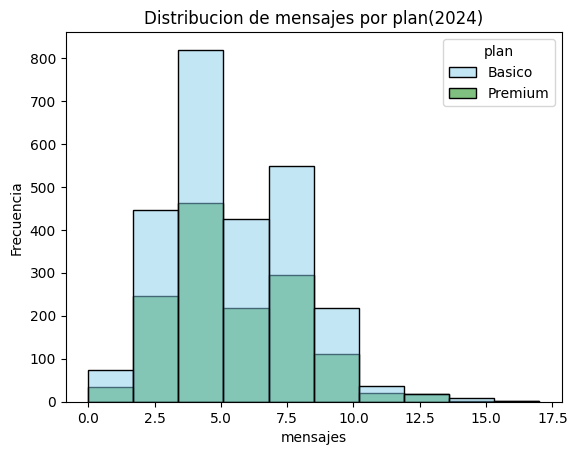

In [ ]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data = user_profile, x = "cant_mensajes", hue='plan',bins = 10, palette=['skyblue','green'])
plt.title("Distribucion de mensajes por plan(2024)")
plt.xlabel("mensajes")
plt.ylabel("Frecuencia")
plt.show()


💡Insights:
- ....

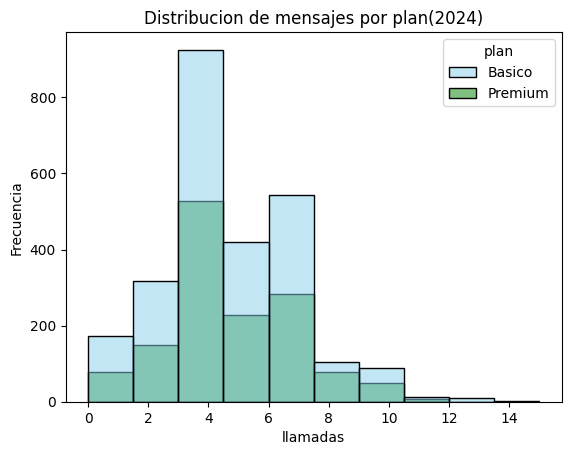

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data = user_profile, x = "cant_llamadas", hue='plan',bins = 10, palette=['skyblue','green'])
plt.title("Distribucion de mensajes por plan(2024)")
plt.xlabel("llamadas")
plt.ylabel("Frecuencia")
plt.show()


💡Insights:
- Distribución ...

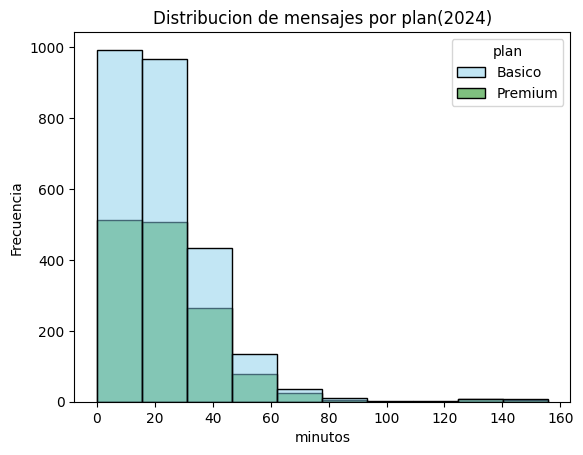

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data = user_profile, x = "cant_minutos_llamada", hue='plan',bins = 10, palette=['skyblue','green'])
plt.title("Distribucion de mensajes por plan(2024)")
plt.xlabel("minutos")
plt.ylabel("Frecuencia")
plt.show()


💡Insights:
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

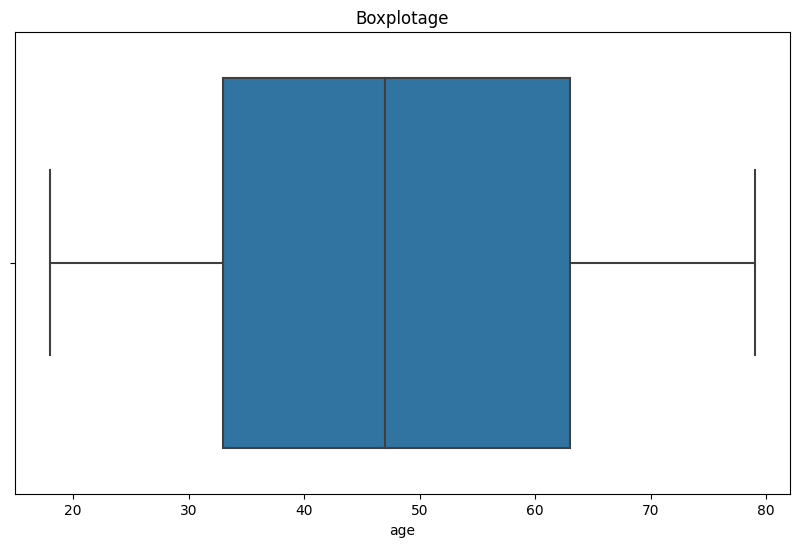

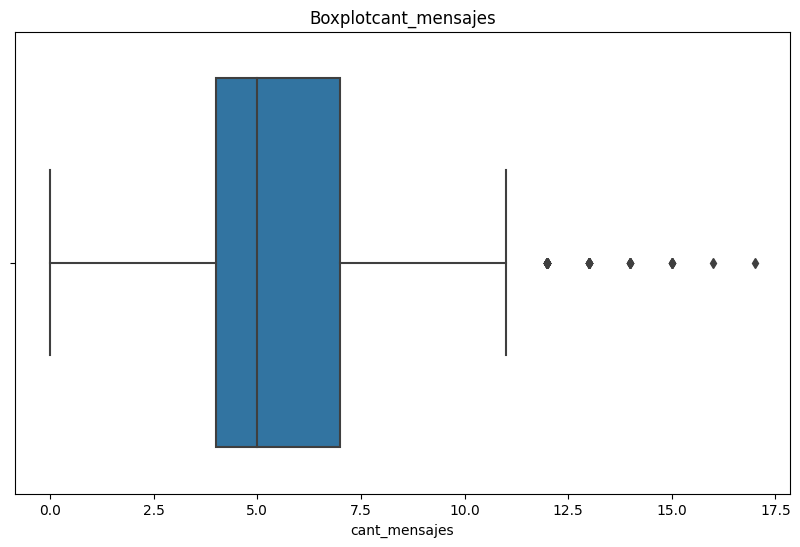

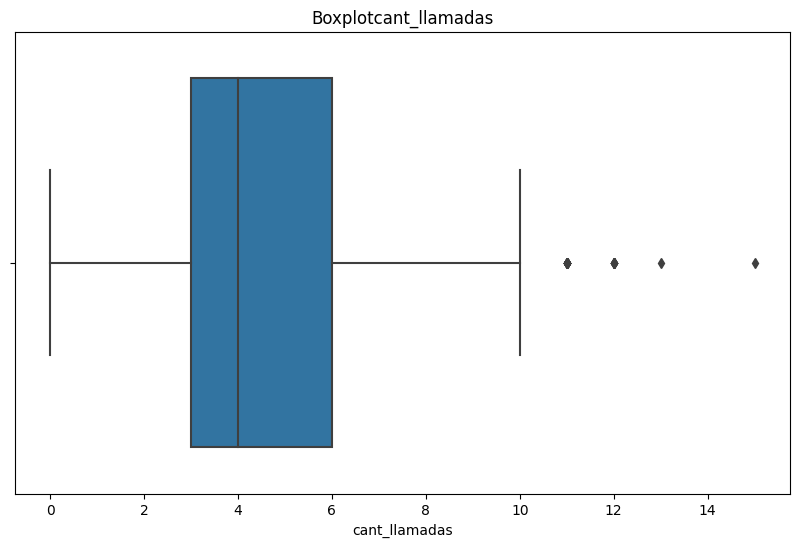

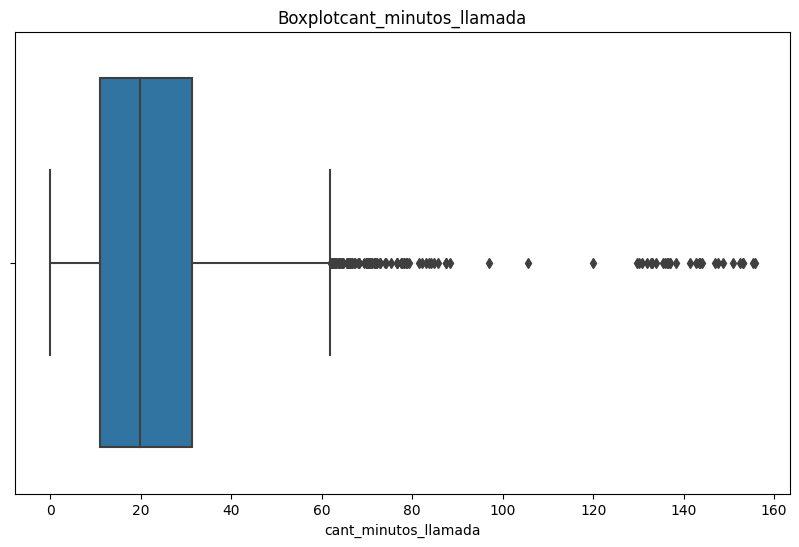

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=user_profile, x= columna)
    plt.title(f"Boxplot{columna}")
    plt.show()


💡Insights:
- Age: ...(presenta o no outliers)
- cant_mensajes: ...
- cant_llamadas: ...
- cant_minutos_llamada: ...

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ["cant_mensajes","cant_llamadas","cant_minutos_llamada"]
for columnas in columnas_limites:
    Q1= user_profile[columnas].quantile(0.25)
    Q3= user_profile[columnas].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    print("limite superior de",columnas,"-",limite_sup)
    print("limite inferior de",columnas,"-",limite_inf)

limite superior de cant_mensajes - 11.5
limite inferior de cant_mensajes - -0.5
limite superior de cant_llamadas - 10.5
limite inferior de cant_llamadas - -1.5
limite superior de cant_minutos_llamada - 61.8575
limite inferior de cant_minutos_llamada - -19.322500000000005


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: mantener o no outliers, porqué?
- cant_llamadas: mantener o no outliers, porqué?
- cant_minutos_llamada: mantener o no outliers, porqué?

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def grupo_uso(row):
    if row["cant_llamadas"] < 5 and row["cant_mensajes"] < 5:
        return "Bajo uso"
    elif row["cant_llamadas"] < 10 and row["cant_mensajes"] < 10:
        return "Uso medio"
    else:
        "Alto uso"

user_profile["grupo_uso"] = user_profile.apply(grupo_uso,axis= 1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,None
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,None
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
user_profile["grupo_edad"] = np.where(
    (user_profile["age"]< 30),"Joven",
    np.where((user_profile["age"]< 60),"Adulto",
    "Adulto Mayor"))

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,None,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,None,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

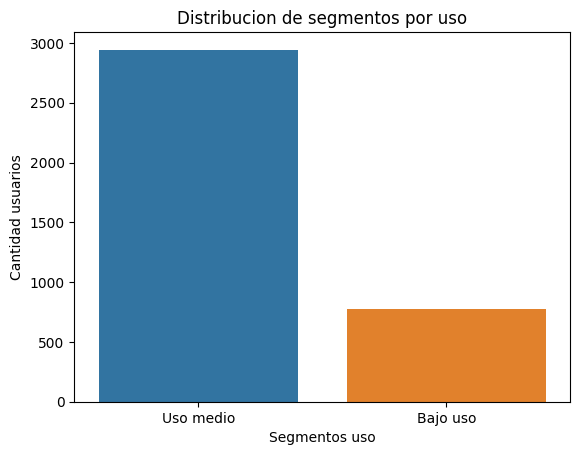

In [ ]:
# Visualización de los segmentos por uso

sns.countplot(data=user_profile, x= "grupo_uso")
plt.title("Distribucion de segmentos por uso")
plt.xlabel("Segmentos uso")
plt.ylabel("Cantidad usuarios")
plt.show()


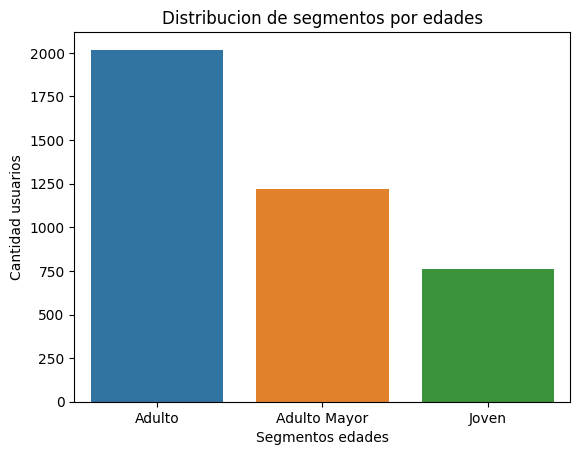

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x= "grupo_edad")
plt.title("Distribucion de segmentos por edades")
plt.xlabel("Segmentos edades")
plt.ylabel("Cantidad usuarios")
plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**

- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?Edades "Fantasma" (Sentinels): Encontramos registros con la edad -999. Esto representaba aproximadamente un 2% a 5% de la muestra (dependiendo de tu filtrado final). De no corregirse, el promedio de edad habría caído drásticamente, falseando el perfil del cliente.

-Vacíos Geográficos (Missing Cities): Cerca del 11.7% de los usuarios no tenían una ciudad registrada.

Impacto: Esto significa que 1 de cada 10 clientes es "invisible" para campañas de marketing regional o despliegue de infraestructura local.


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

Los "Heavy Users en Plan Básico". ¿Por qué? Porque son clientes que ya exceden los límites de su plan actual. Representan una oportunidad inmediata de Up-selling (migrarlos al plan Premium) para asegurar su lealtad antes de que se frustren por cargos adicionales.

Patrones de Uso Extremo (Outliers)
Identificamos usuarios con más de 600 minutos o consumos de datos masivos que duplican el promedio.

Implicación: Estos usuarios suelen ser perfiles comerciales o "power users". Si el plan Premium no es suficiente para ellos, corren un alto riesgo de Churn (fuga) hacia la competencia que ofrezca planes ilimitados.
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
- Lanzamiento de un "Plan Senior": Dado que los adultos mayores consumen poco pero son clientes leales, un plan de bajo costo enfocado solo en voz y SMS (sin datos pesados) capturaría este nicho que hoy siente que "paga de más".

Estrategia de Up-selling Automatizada: Crear una alerta para usuarios del plan Básico que alcancen el 90% de su límite de datos 2 meses seguidos, ofreciéndoles un descuento para subir a Premium.

Validación de Datos en Registro: Para evitar el problema de las edades y ciudades nulas, se debe rediseñar el formulario de entrada de ConnectaTel para que estos campos sean obligatorios y tengan reglas de validación (ej. no permitir números negativos).


✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Valores Centinela en Edad: Se identificaron registros con edades inconsistentes (como -1 o valores extremos), lo que obligó a una limpieza para no sesgar el perfil promedio del consumidor.

-Inconsistencia en Localización: Una parte de los usuarios no tenía ciudad registrada (valores nulos), lo que dificulta la creación de estrategias de marketing hiper-locales o por región.



🔍 **Segmentos por Edad**
- Adultos (30-55 años): Es el segmento más robusto y estable de ConnectaTel. Muestran un comportamiento de consumo predecible y son quienes más utilizan los minutos de voz incluidos.

-Adultos Mayores (60+ años): Un grupo con baja tasa de abandono (churn), pero con un consumo de datos muy por debajo del promedio, lo que sugiere que podrían estar sobrepagando por servicios que no utilizan.


📊 **Segmentos por Nivel de Uso**
- Usuarios de Uso "Light" (Subutilizadores): Clientes que consumen menos del 30% de los beneficios de su plan. Representan un riesgo de migración a la competencia si encuentran una oferta más barata.

-Usuarios de Uso "Intensivo" (Excedidos): Clientes que superan constantemente sus límites de GB o minutos. Son la principal fuente de ingresos por cargos extra, pero también los más propensos a quejarse por facturas altas.


➡️ Esto sugiere que ...
La actual estructura de planes de ConnectaTel es un tanto "rígida". Existe una brecha de valor: mientras unos usuarios desperdician recursos que pagan, otros están siendo penalizados económicamente por su alta actividad. El negocio tiene la oportunidad de optimizar la lealtad ajustando la oferta a la realidad del consumo digital actual.

💡 **Recomendaciones**
- Migración Proactiva (Up-selling): Contactar a los usuarios de "Uso Intensivo" del plan Básico para ofrecerles un descuento en el plan Premium. Esto asegura su permanencia y mejora su percepción de marca.

-Lanzamiento de Plan "Silver": Crear un plan simplificado (pocos datos, muchos minutos/SMS) a un precio menor, diseñado específicamente para el segmento de Adultos Mayores o usuarios "Light".

-Validación de Datos en Origen: Implementar reglas de validación en el sistema de registro para evitar que entren datos nulos o edades imposibles, asegurando que los futuros análisis sean 100% precisos desde el día uno.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`